In [12]:
from salishsea_tools import grid_tools, nc_tools, timeseries_tools, viz_tools
import visualisations
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import xarray as xr
import datetime
from scipy import signal
import cmocean
import statsmodels.api as sm
from matplotlib.colors import LogNorm
from scipy import signal
%matplotlib inline

In [3]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
f0 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/21sep14/SalishSea_1h_20140921_20140927_ptrc_T.nc')
f1 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/15oct14/SalishSea_1h_20141015_20141025_ptrc_T.nc')
f2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27nov14/SalishSea_1h_20141127_20141204_ptrc_T.nc')
f3 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03dec14/SalishSea_1h_20141203_20141211_ptrc_T.nc')
f4 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec14/SalishSea_1h_20141223_20141230_ptrc_T.nc')
f5 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/16apr15/SalishSea_1h_20150416_20150423_ptrc_T.nc')
f6 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/25apr15/SalishSea_1h_20150425_20150429_ptrc_T.nc')
f7 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/30apr15/SalishSea_1h_20150430_20150503_ptrc_T.nc')
f8 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03jun15/SalishSea_1h_20150603_20150622_ptrc_T.nc')
f9 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29jun15/SalishSea_1h_20150629_20150706_ptrc_T.nc')
f10 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13jul15/SalishSea_1h_20150713_20150722_ptrc_T.nc')
f11 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/09aug15/SalishSea_1h_20150809_20150824_ptrc_T.nc')
f12 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27aug15/SalishSea_1h_20150827_20150903_ptrc_T.nc')
f13 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10sep15/SalishSea_1h_20150910_20151013_ptrc_T.nc')
f14 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13nov15/SalishSea_1h_20151113_20151125_ptrc_T.nc')
f15 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13dec15/SalishSea_1h_20151212_20151215_ptrc_T.nc')
f16 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec15/SalishSea_1h_20151223_20151226_ptrc_T.nc')
f17 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jan16/SalishSea_1h_20160110_20160206_ptrc_T.nc')
f18 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/26mar16/SalishSea_1h_20160326_20160329_ptrc_T.nc')
f19 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03may16/SalishSea_1h_20160503_20160514_ptrc_T.nc')
f20 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17may16/SalishSea_1h_20160517_20160520_ptrc_T.nc')
f21 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/24jul16/SalishSea_1h_20160724_20160802_ptrc_T.nc')
f22 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/02aug16/SalishSea_1h_20160802_20160828_ptrc_T.nc')
f23 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29dec16/SalishSea_1h_20161229_20170102_ptrc_T.nc')
f24 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03apr17/SalishSea_1h_20170403_20170407_ptrc_T.nc')
f25 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jun17/SalishSea_1h_20170610_20170616_ptrc_T.nc')
f26 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/19jun17/SalishSea_1h_20170619_20170629_ptrc_T.nc')
f27 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/08jul17/SalishSea_1h_20170708_20170711_ptrc_T.nc')
f28 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23jul17/SalishSea_1h_20170723_20170728_ptrc_T.nc')
f29 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/12sep17/SalishSea_1h_20170912_20170916_ptrc_T.nc')
f30 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17dec17/SalishSea_1h_20171217_20171221_ptrc_T.nc')

In [5]:
f0surface = f0.variables['mytracer6'][:, :, 550:700, 100:150]

In [6]:
f1surface = f1.variables['mytracer6'][:, :, 550:700, 100:150]

In [7]:
f2surface = f2.variables['mytracer6'][:, :, 550:700, 100:150]
f3surface = f3.variables['mytracer6'][:, :, 550:700, 100:150]

In [8]:
f4surface = f4.variables['mytracer6'][:, :, 550:700, 100:150]
f5surface = f5.variables['mytracer6'][:, :, 550:700, 100:150]

In [9]:
f6surface = f6.variables['mytracer6'][:, :, 550:700, 100:150]

In [10]:
f7surface = f7.variables['mytracer6'][:, :, 550:700, 100:150]

In [11]:
f8surface = f8.variables['mytracer6'][:, :, 550:700, 100:150]

In [12]:
f9surface = f9.variables['mytracer6'][:, :, 550:700, 100:150]
f10surface = f10.variables['mytracer6'][:, :, 550:700, 100:150]

In [13]:
f11surface = f11.variables['mytracer6'][:, :, 550:700, 100:150]

In [14]:
f12surface = f12.variables['mytracer6'][:, :, 550:700, 100:150]

In [15]:
f13surface = f13.variables['mytracer6'][:, :, 550:700, 100:150]
f14surface = f14.variables['mytracer6'][:, :, 550:700, 100:150]

In [16]:
f15surface = f15.variables['mytracer6'][:, :, 550:700, 100:150]

In [17]:
f16surface = f16.variables['mytracer6'][:, :, 550:700, 100:150]

In [18]:
f17surface = f17.variables['mytracer6'][:, :, 550:700, 100:150]

In [19]:
f18surface = f18.variables['mytracer6'][:, :, 550:700, 100:150]
f19surface = f19.variables['mytracer6'][:, :, 550:700, 100:150]

In [20]:
f20surface = f20.variables['mytracer6'][:, :, 550:700, 100:150]
f21surface = f21.variables['mytracer6'][:, :, 550:700, 100:150]

In [21]:
f22surface = f22.variables['mytracer6'][:, :, 550:700, 100:150]

In [22]:
f23surface = f23.variables['mytracer6'][:, :, 550:700, 100:150]
f24surface = f24.variables['mytracer6'][:, :, 550:700, 100:150]
f25surface = f25.variables['mytracer6'][:, :, 550:700, 100:150]

In [23]:
f26surface = f26.variables['mytracer6'][:, :, 550:700, 100:150]
f27surface = f27.variables['mytracer6'][:, :, 550:700, 100:150]
f28surface = f28.variables['mytracer6'][:, :, 550:700, 100:150]

In [24]:
f29surface = f29.variables['mytracer6'][:,:,550:700,100:150]
f30surface = f30.variables['mytracer6'][:,:,550:700,100:150]

In [25]:
together = np.append(f0surface, f1surface, axis = 0)
for f in ([f2surface,f3surface,f4surface,f5surface,f6surface,f7surface,f8surface,f9surface, 
           f10surface, f11surface, f12surface, f13surface, f14surface, f15surface, f16surface,
           f17surface, f18surface, f19surface, f20surface, f21surface, f22surface, f23surface,
           f24surface, f25surface, f26surface, f27surface, f28surface, f29surface, f30surface]):
    together = np.append(together, f, axis = 0)
together.shape

(7440, 40, 150, 50)

In [26]:
import visualisations

In [24]:
bs_thalweg0 = np.loadtxt('bs_thalweg.txt')

In [15]:
mesh3 = nc.Dataset('mesh2.nc')
bathy3 = nc.Dataset('bathy2.nc')

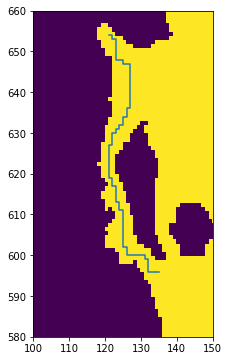

In [34]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
ax.set_xlim(100, 150)
ax.set_ylim(580,660)
viz_tools.set_aspect(ax)
ax.pcolormesh(mesh.variables['tmask'][0,0,...]);

In [29]:
together[together > 2] = 0

In [30]:
together.max()

1.1740781

In [6]:
from salishsea_tools import visualisations as vis2

In [32]:
dates = np.array([])
for f in ([f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16,
           f17, f18, f19, f20, f21, f22, f23,f24, f25, f26, f27, f28, f29, f30]):
    dates = np.append(dates, nc.num2date(f.variables['time_counter'][:], f.variables['time_counter'].units))

In [5]:
import matplotlib.gridspec as gridspec

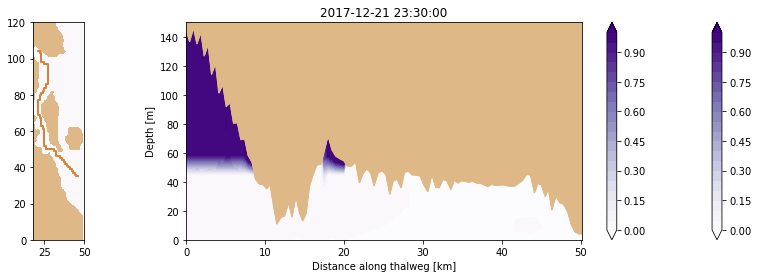

In [39]:
fig, ax = plt.subplots(figsize = (15,4))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, :1])
ax2 = plt.subplot(gs[0, 1:])
def init():
    vis2.contour_thalweg(ax2, together[0,...], bathy3, mesh3, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg_cropped.txt')
    ax1.contourf(np.ma.masked_array(together[0,0,...], mask= 1 - mesh3.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax1.contourf(mesh3.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax1.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax1.set_ylim(0, 120)
    ax1.set_xlim(18, 50)
    viz_tools.set_aspect(ax1)
def animate30(i):
    ax1.clear()
    ax2.clear()
    visualisations.contour_thalweg(ax2, together[i,...], bathy3, mesh3, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg_cropped.txt')
    ax2.set_ylim(150, 0)
    ax2.set_title(dates[i])
    ax1.contourf(np.ma.masked_array(together[i,0,...], mask= 1 - mesh3.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax1.contourf(mesh3.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax1.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax1.set_ylim(0, 120)
    ax1.set_xlim(18, 50)
    viz_tools.set_aspect(ax1)
    return ax
interval = 0.1#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=7440,init_func = init, 
                                interval=interval*1e+3, repeat=False)
ani40

In [13]:
grid = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
winds_data = xr.open_dataset(
    'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)

In [19]:
bathy = nc.Dataset('/data/vdo/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/vdo/MEOPAR/grid/mesh_mask201702.nc')

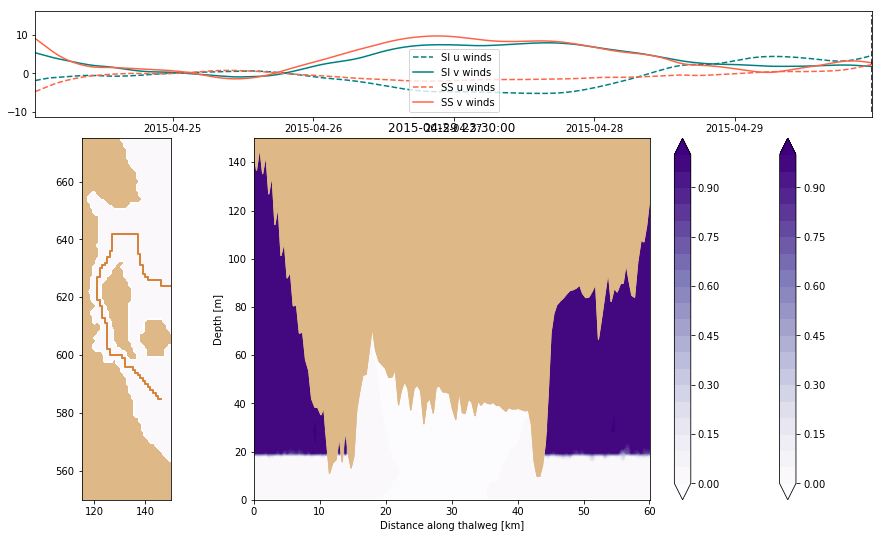

In [121]:
trc_full = nc.Dataset('/data/vdo/MEOPAR/SalishSea_1h_20150424_20150429_ptrc_T.nc')
fig, ax = plt.subplots(figsize = (15,9))
gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1:, 0])
ax3 = plt.subplot(gs[1:, 1:])
first = nc.num2date(trc_full.variables['time_counter'][0], 
                        trc_full.variables['time_counter'].units)
dates = nc.num2date(trc_full.variables['time_counter'][:], trc_full.variables['time_counter'].units)
end_index = trc_full.variables['time_counter'][:].shape[0]
times = np.array([first + datetime.timedelta(hours = i) for i in range(end_index)])
averaged_SI_u_winds = np.array([])
averaged_SI_v_winds = np.array([])
averaged_SS_u_winds = np.array([])
averaged_SS_v_winds = np.array([])
for n in range(end_index):
    SI_u_winds = winds_data.u_wind.isel(gridY=slice(159,162), 
                                        gridX=slice(119,122)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SI_u_winds = np.append(averaged_SI_u_winds, np.mean(SI_u_winds))
    SI_v_winds = winds_data.v_wind.isel(gridY=slice(159,162), 
                                        gridX=slice(119,122)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SI_v_winds = np.append(averaged_SI_v_winds, np.mean(SI_v_winds))
    SS_u_winds = winds_data.u_wind.isel(gridY=slice(182,185), 
                                        gridX=slice(106,109)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SS_u_winds = np.append(averaged_SS_u_winds, np.mean(SS_u_winds))
    SS_v_winds = winds_data.v_wind.isel(gridY=slice(182,185), 
                                        gridX=slice(106,109)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SS_v_winds = np.append(averaged_SS_v_winds, np.mean(SS_v_winds))
rotated_SI_u_winds, rotated_SI_v_winds = viz_tools.rotate_vel(averaged_SI_u_winds, 
                                                              averaged_SI_v_winds, 
                                                              origin = 'map' )
rotated_SS_u_winds, rotated_SS_v_winds = viz_tools.rotate_vel(averaged_SS_u_winds, 
                                                              averaged_SS_v_winds, 
                                                              origin = 'map' )
SIwindfu = signal.filtfilt(B,A, rotated_SI_u_winds)
SIwindfv = signal.filtfilt(B,A, rotated_SI_v_winds)
SSwindfu = signal.filtfilt(B,A, rotated_SS_u_winds)
SSwindfv = signal.filtfilt(B,A, rotated_SS_v_winds)
def init():
    vis2.contour_thalweg(ax3, trc_full.variables['mytracer3'][0,...], 
                         bathy, mesh, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg.txt')
    ax2.contourf(np.ma.masked_array(trc_full.variables['mytracer3'][0,0,...], 
                                    mask= 1 - mesh.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax2.contourf(mesh.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax2.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax2.set_ylim(550, 675)
    ax2.set_xlim(115, 150)
    viz_tools.set_aspect(ax2)
def animate30(i):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax1.plot(times, SIwindfu, '--', color = 'teal', label = 'SI u winds')
    ax1.plot(times, SIwindfv, '-', color = 'teal', label = 'SI v winds')
    ax1.plot(times, SSwindfu, '--', color = 'tomato', label = 'SS u winds')
    ax1.plot(times, SSwindfv, '-', color = 'tomato', label = 'SS v winds')
    ax1.plot((dates[i], dates[i]), (-10,15), 'b--', color = 'black')
    ax1.legend()
    ax1.set_xlim(dates[0], dates[-1])
    visualisations.contour_thalweg(ax3, trc_full.variables['mytracer3'][i,...], 
                                   bathy, mesh, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg.txt')
    ax3.set_ylim(150, 0)
    ax3.set_title(dates[i])
    ax2.contourf(np.ma.masked_array(trc_full.variables['mytracer3'][i,0,...], 
                                    mask= 1 - mesh.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax2.contourf(mesh.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax2.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax2.set_ylim(550, 675)
    ax2.set_xlim(115, 150)
    viz_tools.set_aspect(ax2)
    return ax
interval = 0.2#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=end_index,init_func = init, 
                                interval=interval*1e+3, repeat=False)
ani40

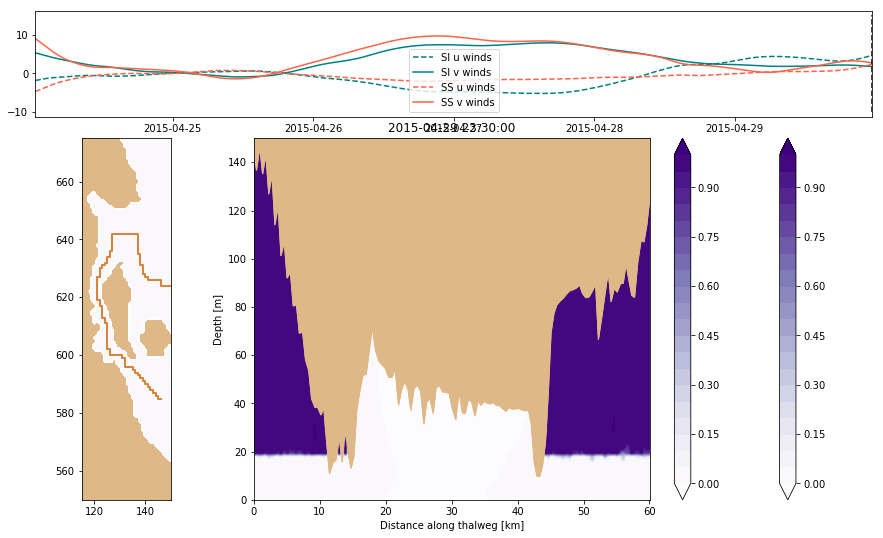

In [122]:
trc_full = nc.Dataset('/data/vdo/MEOPAR/SalishSea/SalishSea_1h_20150424_20150429_ptrc_T.nc')
fig, ax = plt.subplots(figsize = (15,9))
gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1:, 0])
ax3 = plt.subplot(gs[1:, 1:])
first = nc.num2date(trc_full.variables['time_counter'][0], 
                        trc_full.variables['time_counter'].units)
dates = nc.num2date(trc_full.variables['time_counter'][:], trc_full.variables['time_counter'].units)
end_index = trc_full.variables['time_counter'][:].shape[0]
times = np.array([first + datetime.timedelta(hours = i) for i in range(end_index)])
averaged_SI_u_winds = np.array([])
averaged_SI_v_winds = np.array([])
averaged_SS_u_winds = np.array([])
averaged_SS_v_winds = np.array([])
for n in range(end_index):
    SI_u_winds = winds_data.u_wind.isel(gridY=slice(159,162), 
                                        gridX=slice(119,122)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SI_u_winds = np.append(averaged_SI_u_winds, np.mean(SI_u_winds))
    SI_v_winds = winds_data.v_wind.isel(gridY=slice(159,162), 
                                        gridX=slice(119,122)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SI_v_winds = np.append(averaged_SI_v_winds, np.mean(SI_v_winds))
    SS_u_winds = winds_data.u_wind.isel(gridY=slice(182,185), 
                                        gridX=slice(106,109)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SS_u_winds = np.append(averaged_SS_u_winds, np.mean(SS_u_winds))
    SS_v_winds = winds_data.v_wind.isel(gridY=slice(182,185), 
                                        gridX=slice(106,109)).sel(time=times[n], 
                                                                  method = 'nearest').values
    averaged_SS_v_winds = np.append(averaged_SS_v_winds, np.mean(SS_v_winds))
rotated_SI_u_winds, rotated_SI_v_winds = viz_tools.rotate_vel(averaged_SI_u_winds, 
                                                              averaged_SI_v_winds, 
                                                              origin = 'map' )
rotated_SS_u_winds, rotated_SS_v_winds = viz_tools.rotate_vel(averaged_SS_u_winds, 
                                                              averaged_SS_v_winds, 
                                                              origin = 'map' )
SIwindfu = signal.filtfilt(B,A, rotated_SI_u_winds)
SIwindfv = signal.filtfilt(B,A, rotated_SI_v_winds)
SSwindfu = signal.filtfilt(B,A, rotated_SS_u_winds)
SSwindfv = signal.filtfilt(B,A, rotated_SS_v_winds)
def init():
    vis2.contour_thalweg(ax3, trc_full.variables['mytracer3'][0,...], 
                         bathy, mesh, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg.txt')
    ax2.contourf(np.ma.masked_array(trc_full.variables['mytracer3'][0,0,...], 
                                    mask= 1 - mesh.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax2.contourf(mesh.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax2.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax2.set_ylim(550, 675)
    ax2.set_xlim(115, 150)
    viz_tools.set_aspect(ax2)
def animate30(i):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax1.plot(times, SIwindfu, '--', color = 'teal', label = 'SI u winds')
    ax1.plot(times, SIwindfv, '-', color = 'teal', label = 'SI v winds')
    ax1.plot(times, SSwindfu, '--', color = 'tomato', label = 'SS u winds')
    ax1.plot(times, SSwindfv, '-', color = 'tomato', label = 'SS v winds')
    ax1.plot((dates[i], dates[i]), (-10,15), 'b--', color = 'black')
    ax1.legend()
    ax1.set_xlim(dates[0], dates[-1])
    visualisations.contour_thalweg(ax3, trc_full.variables['mytracer3'][i,...], 
                                   bathy, mesh, np.arange(0,1.05,0.05), cmap = 'Purples',
                              thalweg_file = 'bs_thalweg.txt')
    ax3.set_ylim(150, 0)
    ax3.set_title(dates[i])
    ax2.contourf(np.ma.masked_array(trc_full.variables['mytracer3'][i,0,...], 
                                    mask= 1 - mesh.variables['tmask'][0,0,...]),
                    cmap = 'Purples', levels = np.arange(0,1.05, 0.05))
    ax2.contourf(mesh.variables['tmask'][0,0,...], levels=[-0.01, 0.01], colors='burlywood')
    ax2.plot(bs_thalweg0[:,1], bs_thalweg0[:,0])
    ax2.set_ylim(550, 675)
    ax2.set_xlim(115, 150)
    viz_tools.set_aspect(ax2)
    return ax
interval = 0.2#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=end_index,init_func = init, 
                                interval=interval*1e+3, repeat=False)
ani40

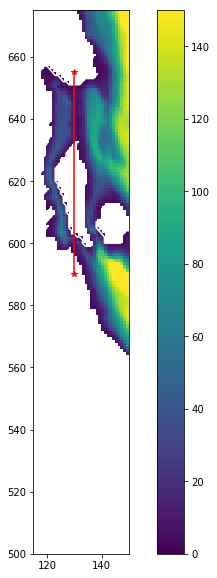

In [102]:
fig, ax = plt.subplots(figsize = (10,10))
b = ax.pcolormesh(np.ma.masked_array(grid.Bathymetry.values, mask = 1 - mesh.variables['tmask'][0,0,...]),
                 vmin = 0, vmax = 150)
fig.colorbar(b, ax=ax)
ax.set_ylim(500, 675)
ax.set_xlim(115, 150)
viz_tools.set_aspect(ax)
plt.plot(130, 655, 'r*')
plt.plot(130, 590, 'r*')
plt.plot((130, 130), (590, 655), 'r')
viz_tools.plot_coastline(ax, bathy,  color = 'white')

(-125, -124.5)

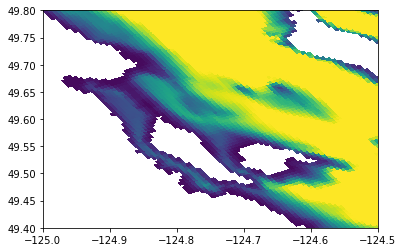

In [97]:
plt.pcolormesh(grid.nav_lon, grid.nav_lat, 
               np.ma.masked_array(grid.Bathymetry.values, mask = 1 - mesh.variables['tmask'][0,0,...]),
              vmin = 0, vmax = 150)
plt.ylim(49.4, 49.8)
plt.xlim(-125, -124.5)

In [105]:
print(grid.nav_lon.isel(y = 655, x = 130), grid.nav_lat.isel(y = 655, x = 130))

<xarray.DataArray 'nav_lon' ()>
array(-124.906021)
Attributes:
    units:      degrees_east
    long_name:  longitude <xarray.DataArray 'nav_lat' ()>
array(49.689354)
Attributes:
    units:      degrees_north
    long_name:  latitude


In [106]:
print(grid.nav_lon.isel(y = 590, x = 130), grid.nav_lat.isel(y = 590, x = 130))

<xarray.DataArray 'nav_lon' ()>
array(-124.689445)
Attributes:
    units:      degrees_east
    long_name:  longitude <xarray.DataArray 'nav_lat' ()>
array(49.43483)
Attributes:
    units:      degrees_north
    long_name:  latitude
